In [2]:
#importing all the Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import glob
import seaborn as sb
#import cv2 as cv
import skimage.io as io
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
filepathcsv = r"C:\Users\DELL\Desktop\IDSPROJJ\labels.csv"
filepathpics = r"C:\Users\DELL\Desktop\IDSPROJJ\images\\"
df = pd.read_csv(filepathcsv)
from sklearn.utils import resample,shuffle
df['overall_sentiment'] = df['overall_sentiment'].map({'very_positive':0,'positive':1,'neutral':2,'negative':3,'very_negative':4})
df.head()

df['overall_sentiment'].value_counts()



1    3127
2    2201
0    1033
3     480
4     151
Name: overall_sentiment, dtype: int64

In [4]:
df_maj=df[df['overall_sentiment']==1]
#df_maj
df_min = df[df['overall_sentiment']!=1]
df_min

,Unnamed: 0,image_name,text_ocr,text_corrected,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,0
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,0
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,2
5,5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",3
6,6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,3
...,...,...,...,...,...
6984,6984,image_6985.jpg,YOU'RE THE BEST AROUND. NOTHING'S EVER GONNA K...,YOU'RE THE BEST AROUND. NOTHING'S EVER GONNA K...,0
6985,6985,image_6986.jpg,WHAT OILS ARE GOOD POR CUTTING THAT POUL SMELL...,WHAT OILS ARE GOOD POR CUTTING THAT POUL SMELL...,2
6987,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,2
6988,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,2


In [5]:
upsample_df=resample(df_min, replace=True, n_samples=len(df_maj), random_state=50)
upsample_df=pd.concat([upsample_df, df_maj])
upsample_df['overall_sentiment'].value_counts()

1    3127
2    1733
0     891
3     375
4     128
Name: overall_sentiment, dtype: int64

In [6]:
df=upsample_df.reset_index(drop=True)


In [7]:
memes =[]
for i in range(len(df)):
    meme = io.imread( r"C:\Users\DELL\Desktop\IDSPROJJ\images\\"+df["image_name"][i])
    memes.append(meme)   

In [8]:
preprocess = []
counter = len(memes)
for i in range(counter):
    preprocess.append(np.array(Image.fromarray(memes[i]).convert("L").resize((200,200))))
    

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

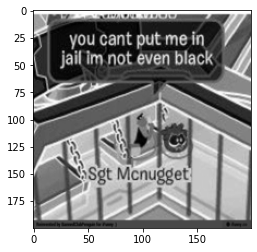

In [9]:
plt.imshow(preprocess[0].reshape((200,200)),cmap=plt.cm.binary)
plt.imshow

In [10]:
sentiments = df["overall_sentiment"]

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(preprocess,sentiments,test_size=0.1,random_state=50)

In [12]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [13]:
s1,x1,y1=xtrain.shape
s2,x2,y2=xtest.shape
xtrain = xtrain.reshape(s1,x1*y1)
xtest = xtest.reshape(s2,x2*y2)

In [14]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier()
model2 = model2.fit(xtrain,ytrain)

In [15]:
predict2 = model2.predict(xtest)
predict2

array([0, 1, 1, 0, 2, 0, 2, 2, 1, 4, 1, 1, 2, 1, 2, 2, 0, 0, 3, 2, 1, 2,
       1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 3, 3, 2, 1, 1, 0, 0, 1, 3, 1,
       1, 1, 0, 2, 1, 0, 2, 4, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 4, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 3, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 3, 2, 2, 3,
       1, 2, 2, 1, 1, 3, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 2, 3, 1, 2, 1, 3, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 3, 1, 2, 2, 3, 2, 1, 2, 1, 2,
       1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 1, 0, 4, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 3, 2, 0, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 3, 1, 3, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 3, 2, 1, 1,
       1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 0, 1, 2, 1, 0, 1, 3, 1, 1, 2, 1, 2, 0,

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print(classification_report(ytest,predict2))
print(accuracy_score(ytest,predict2)*100)
print(f1_score(ytest,predict2,average="weighted")*100)
macrof1 = f1_score(ytest,predict2,average="weighted")
weightedf1 = f1_score(ytest,predict2,average="macro")


              precision    recall  f1-score   support

           0       0.47      0.47      0.47        94
           1       0.68      0.55      0.61       318
           2       0.52      0.63      0.57       174
           3       0.43      0.68      0.53        31
           4       0.46      0.67      0.55         9

    accuracy                           0.57       626
   macro avg       0.51      0.60      0.54       626
weighted avg       0.59      0.57      0.57       626

57.02875399361022
57.29846784319215


In [17]:
from sklearn.neighbors import RadiusNeighborsClassifier, KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [18]:
model1 = KNeighborsClassifier(n_neighbors= 83,weights='distance')
model1.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=83, weights='distance')

In [19]:
predict1 = model1.predict(xtest)
predict1

array([0, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 3, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 4, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 3, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [20]:
print(classification_report(ytest,predict1))
print(accuracy_score(ytest,predict1)*100)
print(f1_score(ytest,predict1,average="weighted")*100)
macrof1 = macrof1 + f1_score(ytest,predict2,average="weighted")
weightedf1 =weightedf1+ f1_score(ytest,predict2,average="macro")


              precision    recall  f1-score   support

           0       1.00      0.44      0.61        94
           1       0.67      1.00      0.80       318
           2       1.00      0.49      0.66       174
           3       0.87      0.65      0.74        31
           4       1.00      0.67      0.80         9

    accuracy                           0.75       626
   macro avg       0.91      0.65      0.72       626
weighted avg       0.83      0.75      0.73       626

75.07987220447284
73.19804208388565


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [22]:
model3 = RandomForestClassifier(random_state=50,n_estimators=100)

In [23]:
model3.fit(xtrain,ytrain)

RandomForestClassifier(random_state=50)

In [24]:
predict3 = model3.predict(xtest)
predict3

array([0, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 3, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 4, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 3, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [25]:
print(classification_report(ytest,predict3))
print(accuracy_score(ytest,predict3)*100)
print(f1_score(ytest,predict3,average="weighted")*100)
macrof1 = macrof1 + f1_score(ytest,predict2,average="weighted")
weightedf1 =weightedf1+ f1_score(ytest,predict2,average="macro")

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        94
           1       0.67      0.98      0.80       318
           2       0.95      0.49      0.65       174
           3       0.87      0.65      0.74        31
           4       1.00      0.67      0.80         9

    accuracy                           0.74       626
   macro avg       0.90      0.64      0.72       626
weighted avg       0.81      0.74      0.72       626

74.12140575079871
72.25563192028241


In [26]:
text = df['text_corrected']
text

0       you cant put me in jail im not even black Sgt ...
1       When you find out your A1C Type 1 Diabetes Mem...
2       Rahul Gandhi these days - We don't need Rafael...
3       ...LEAVE THE RED SOX THEY SAID Dodgers Dodgers...
4              GODFATHER GOT BABY DAUGHTER BRASS KNUCKLES
                              ...                        
6249    IDONTALWAYS PLAYTHE PIANO BUT WHEN IDOIES WITH...
6250    Create a hashtag for this... "NO TIME TO EXPLA...
6251    If you're going on-and-on-and-on about your pr...
6252    LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...
6253    The starting point for every good idea is "Wha...
Name: text_corrected, Length: 6254, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
vec = TfidfVectorizer(max_features=3000,stop_words=stopwords.words('english'),ngram_range=(2,4))
xdata = vec.fit_transform(text.values.astype("U"))
xdata.shape

(6254, 3000)

In [28]:
ydata = df['overall_sentiment'].values
ydata

array([2, 0, 2, ..., 1, 1, 1], dtype=int64)

In [29]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(xdata,ydata,test_size=0.1,random_state=50)
xtrain2 = xtrain2.toarray()
xtest2 = xtest2.toarray()
ytrain2


array([1, 1, 1, ..., 3, 1, 1], dtype=int64)

In [30]:
from sklearn.naive_bayes import MultinomialNB

tmodel = MultinomialNB().fit(xtrain2, ytrain2)


In [31]:

tpredict3 = tmodel.predict(xtest2)
tpredict3

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
print(classification_report(ytest2,tpredict3))
print(accuracy_score(ytest2,tpredict3)*100)
print(f1_score(ytest2,tpredict3,average="weighted")*100)
macrof1 = macrof1 + f1_score(ytest,predict2,average="weighted")
weightedf1 =weightedf1+ f1_score(ytest,predict2,average="macro")

              precision    recall  f1-score   support

           0       0.86      0.19      0.31        94
           1       0.54      0.95      0.69       318
           2       0.63      0.17      0.26       174
           3       0.50      0.03      0.06        31
           4       0.00      0.00      0.00         9

    accuracy                           0.56       626
   macro avg       0.51      0.27      0.27       626
weighted avg       0.61      0.56      0.48       626

56.0702875399361
47.51043392871425


d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
tmodel2 = SGDClassifier(loss='log',penalty='l2',max_iter=10000,n_jobs = -1)

In [34]:
tmodel2.fit(xtrain2,ytrain2)


SGDClassifier(loss='log', max_iter=10000, n_jobs=-1)

In [35]:

tpredict2 = tmodel2.predict(xtest2)
tpredict2

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,

In [36]:
print(classification_report(ytest2,tpredict2))
print(accuracy_score(ytest2,tpredict2)*100)
print(f1_score(ytest2,tpredict2,average="weighted")*100)
macrof1 = macrof1 + f1_score(ytest,predict2,average="weighted")
weightedf1 =weightedf1+ f1_score(ytest,predict2,average="macro")

              precision    recall  f1-score   support

           0       0.61      0.23      0.34        94
           1       0.55      0.87      0.67       318
           2       0.50      0.22      0.30       174
           3       0.50      0.03      0.06        31
           4       0.50      0.11      0.18         9

    accuracy                           0.54       626
   macro avg       0.53      0.29      0.31       626
weighted avg       0.54      0.54      0.48       626

54.31309904153354
48.20491501830577


In [37]:
from sklearn.linear_model import LogisticRegression
tmodelL = LogisticRegression(random_state=50,max_iter = 10000).fit(xtrain2, ytrain2)


In [38]:
tpredict2L = tmodelL.predict(xtest2)
tpredict2L

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,

In [39]:
print(classification_report(ytest2,tpredict2L))
print(accuracy_score(ytest2,tpredict2L)*100)
print(f1_score(ytest2,tpredict2L,average="weighted")*100)
macrof1 = macrof1 + f1_score(ytest,predict2,average="weighted")
weightedf1 =weightedf1+ f1_score(ytest,predict2,average="macro")

              precision    recall  f1-score   support

           0       0.71      0.16      0.26        94
           1       0.54      0.91      0.68       318
           2       0.53      0.21      0.30       174
           3       0.50      0.03      0.06        31
           4       0.00      0.00      0.00         9

    accuracy                           0.55       626
   macro avg       0.46      0.26      0.26       626
weighted avg       0.56      0.55      0.47       626

54.7923322683706
47.269053323742156


d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
txt = "My mother died"
txt=vec.transform([txt])
classes=["very_positive", "positive", "neutral", "negative", "very_negative"]
#txt=tmodel.predict(txt)
print(txt)

In [41]:
txtpred1 = tmodel.predict(txt)
txtpred2 = tmodel2.predict(txt)
txtpred3 = tmodelL.predict(txt)
print(txtpred1)
print(txtpred2)
print(txtpred3)

[1]
[1]
[1]


In [42]:
memefilepth = r"C:\Users\DELL\Desktop\image_5.png"

    

In [43]:
memeC=Image.open(memefilepth)
memeC=memeC.convert("L")   
memeC=memeC.resize((200, 200)) 
memeC=np.array(memeC)  
memeC=np.array(memeC)/255.0
nx, ny=memeC.shape  
memeC=memeC.reshape((1, nx*ny)) 

In [44]:
imgpred1 = model1.predict(memeC)
imgpred2 =model2.predict(memeC)
imgpred3 =model3.predict(memeC)
print (imgpred1)
print (imgpred2)
print (imgpred3)

[1]
[1]
[1]


In [45]:
Totalresult = [classes[txtpred1[0]],classes[txtpred2[0]],classes[txtpred3[0]],classes[imgpred1[0]],classes[imgpred2[0]],classes[imgpred3[0]]]
Totalresult

['positive', 'positive', 'positive', 'positive', 'positive', 'positive']

In [46]:
from statistics import mode
print (mode(Totalresult))

positive


In [47]:
temp = macrof1
macrof1 = weightedf1
weightedf1 = temp
macrof1 = macrof1/6
weightedf1 = weightedf1/6
print(macrof1)
print(weightedf1)

0.5439197898954266
0.5729846784319214


In [49]:
import pickle as pik
pik.dump(model2, open("DecisionTree.pkl", "wb"))
pik.dump(model1, open("KNearestNeighbors.pkl", "wb"))
pik.dump(model3, open("RandomForest.pkl", "wb"))
pik.dump(tmodel, open("Multinomial.pkl", "wb"))
pik.dump(tmodel2, open("SGDClassifier.pkl", "wb"))
pik.dump(tmodelL, open("LogisticRegression.pkl", "wb"))


In [51]:
from flask import Flask


ImportError: cannot import name 'Flask' from 'flask' (c:\Users\DELL\Desktop\IDSPROJJ\flask.py)